<a href="https://colab.research.google.com/github/Hamiltonfelipe/Hamilton-Felipe/blob/main/Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [325]:
pd.read_csv('Consumo_cerveja.csv').replace({';':','},regex= True)

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

## Leitura dos dados

In [326]:
Dados=pd.read_csv('Consumo_cerveja.csv')

## Visualizar os dados

In [327]:
Dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


## Verificando o tamanho do dataset

In [328]:
Dados.shape

(365, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [329]:
Dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


In [330]:
Dados_correlação= Dados.drop(columns=['data'])
Dados_correlação.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

## Plotando a variável *dependente* (y)
https://pandas.pydata.org/pandas-docs/stable/visualization.html

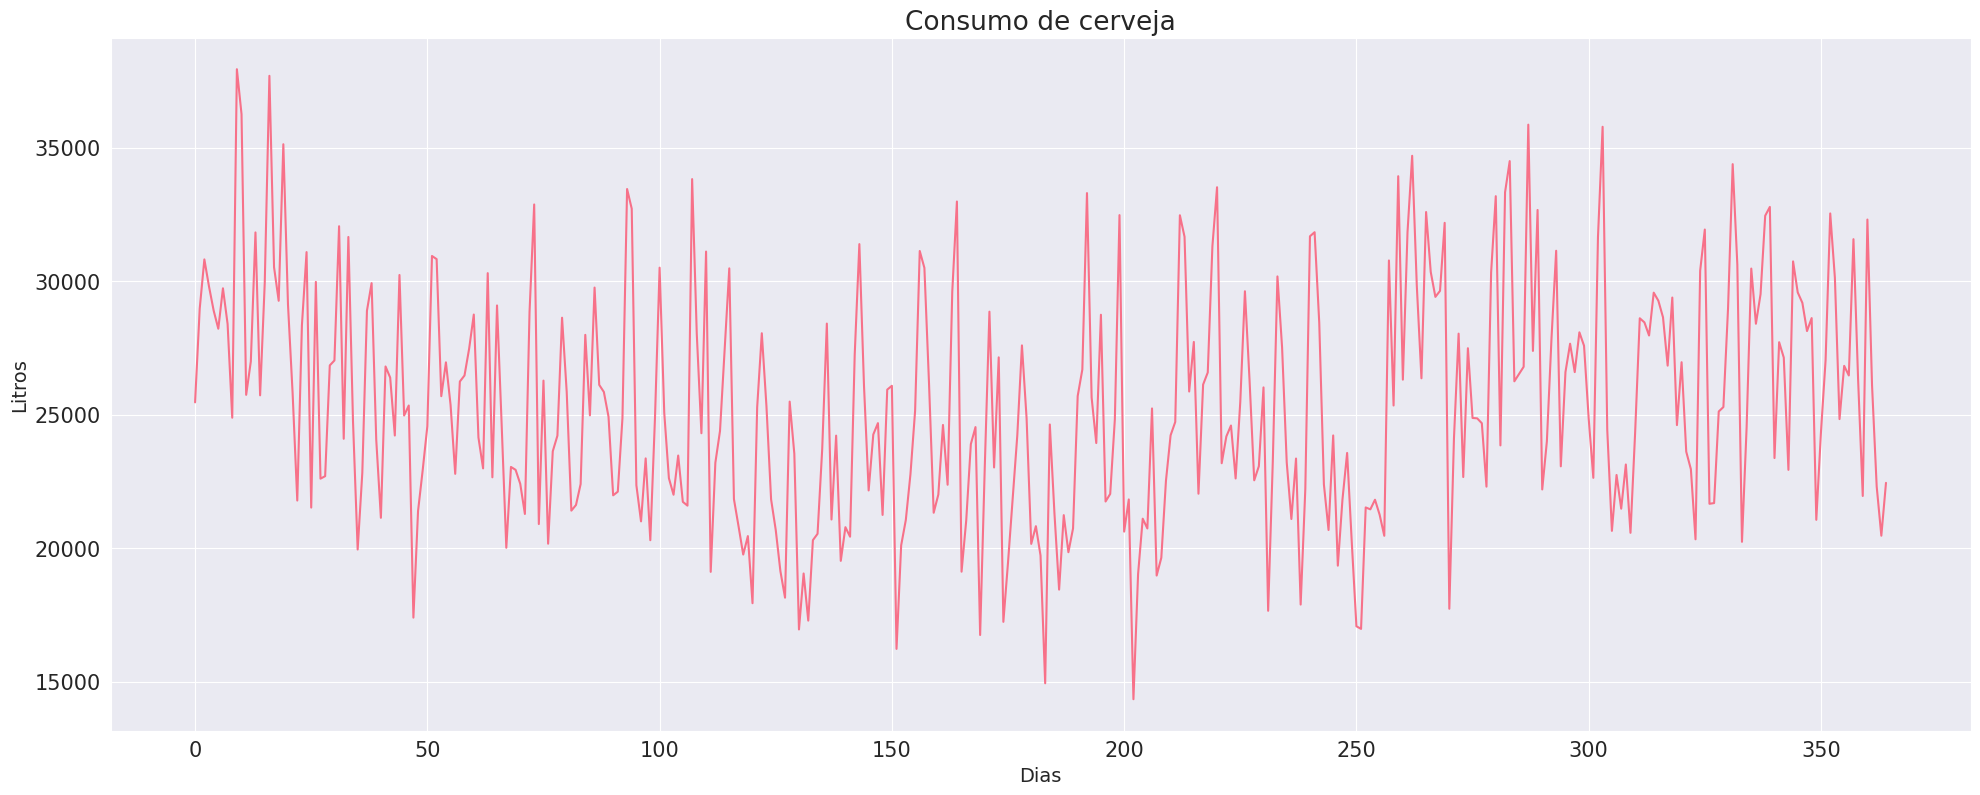

In [331]:
fig, ax= plt.subplots(figsize= (24,9))
ax.set_title('Consumo de cerveja',fontsize=19)
ax.set_ylabel('Litros',fontsize=14)
ax.set_xlabel('Dias',fontsize=14)
ax= Dados['consumo'].plot(fontsize= 15)

# <font color='red' style='font-size: 30px;'>Box Plot</font>
<hr style='border: 2px solid red;'>

In [332]:
import seaborn as sns

## Box plot da variável *dependente* (y)

Text(0.5, 0, 'Litros')

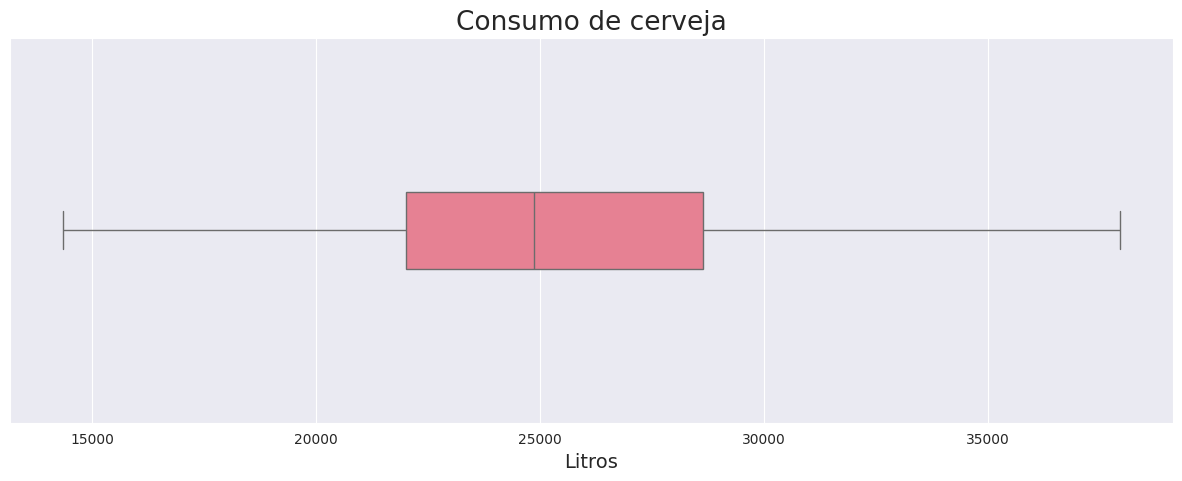

In [333]:
bp = sns.boxplot(data=Dados['consumo'], orient='h', width=0.2)
bp.figure.set_size_inches(15,5)
bp.set_title('Consumo de cerveja',fontsize=19)
bp.set_xlabel('Litros',fontsize=14)

# <font color='red' style='font-size: 30px;'>Box Plot com Duas Variáveis</font>
<hr style='border: 2px solid red;'>

## Investigando a variável *dependente* (y) segundo determinada característica

In [334]:
import seaborn as sns

In [335]:
sns.set_palette("husl", 9)

In [336]:
sns.set_style('darkgrid')

Text(0.5, 0, 'Final de semana')

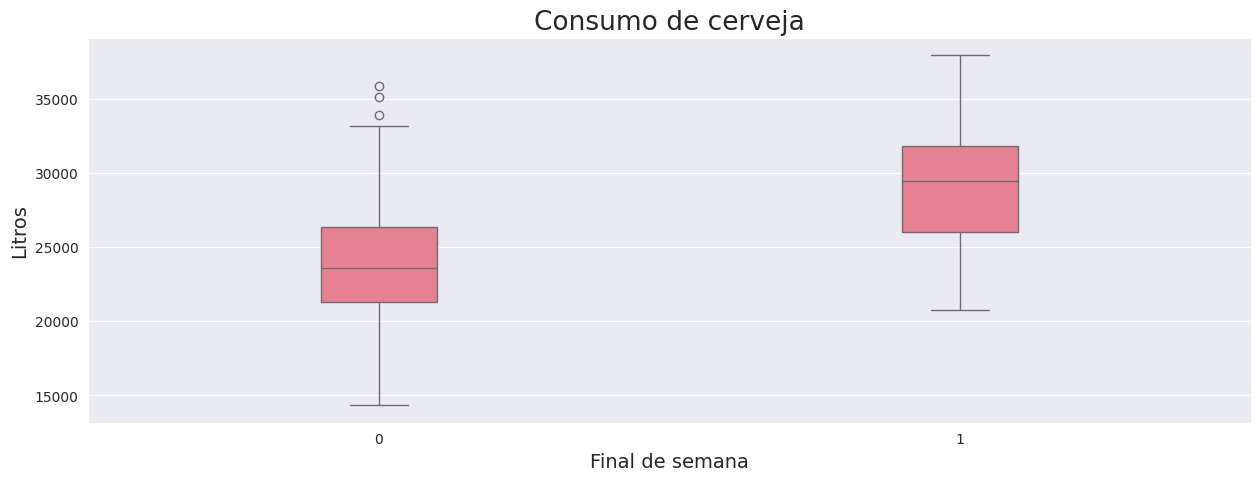

In [337]:
bp = sns.boxplot(data=Dados,y='consumo',x='fds', orient='v', width=0.2)
bp.figure.set_size_inches(15,5)
bp.set_title('Consumo de cerveja',fontsize=19)
bp.set_ylabel('Litros',fontsize=14)
bp.set_xlabel('Final de semana',fontsize=14)


# <font color='red' style='font-size: 30px;'>Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

<ipython-input-338-67e4ce1e1ae9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dp= sns.distplot(Dados['consumo'])


Text(0.5, 0, 'Consumo de cerveja(Litros)')

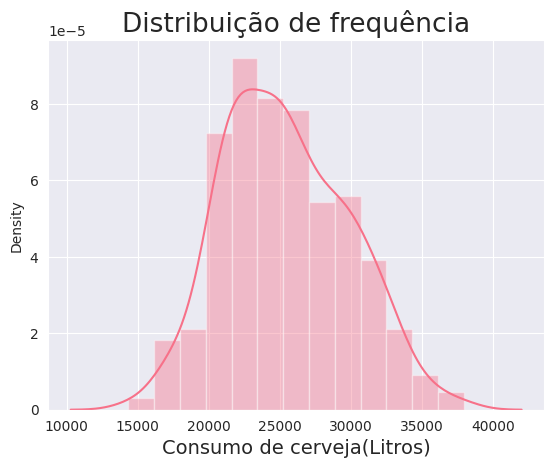

In [338]:
dp= sns.distplot(Dados['consumo'])
dp.set_title('Distribuição de frequência',fontsize=19)
dp.set_xlabel('Consumo de cerveja(Litros)',fontsize=14)

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (pairplot)</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

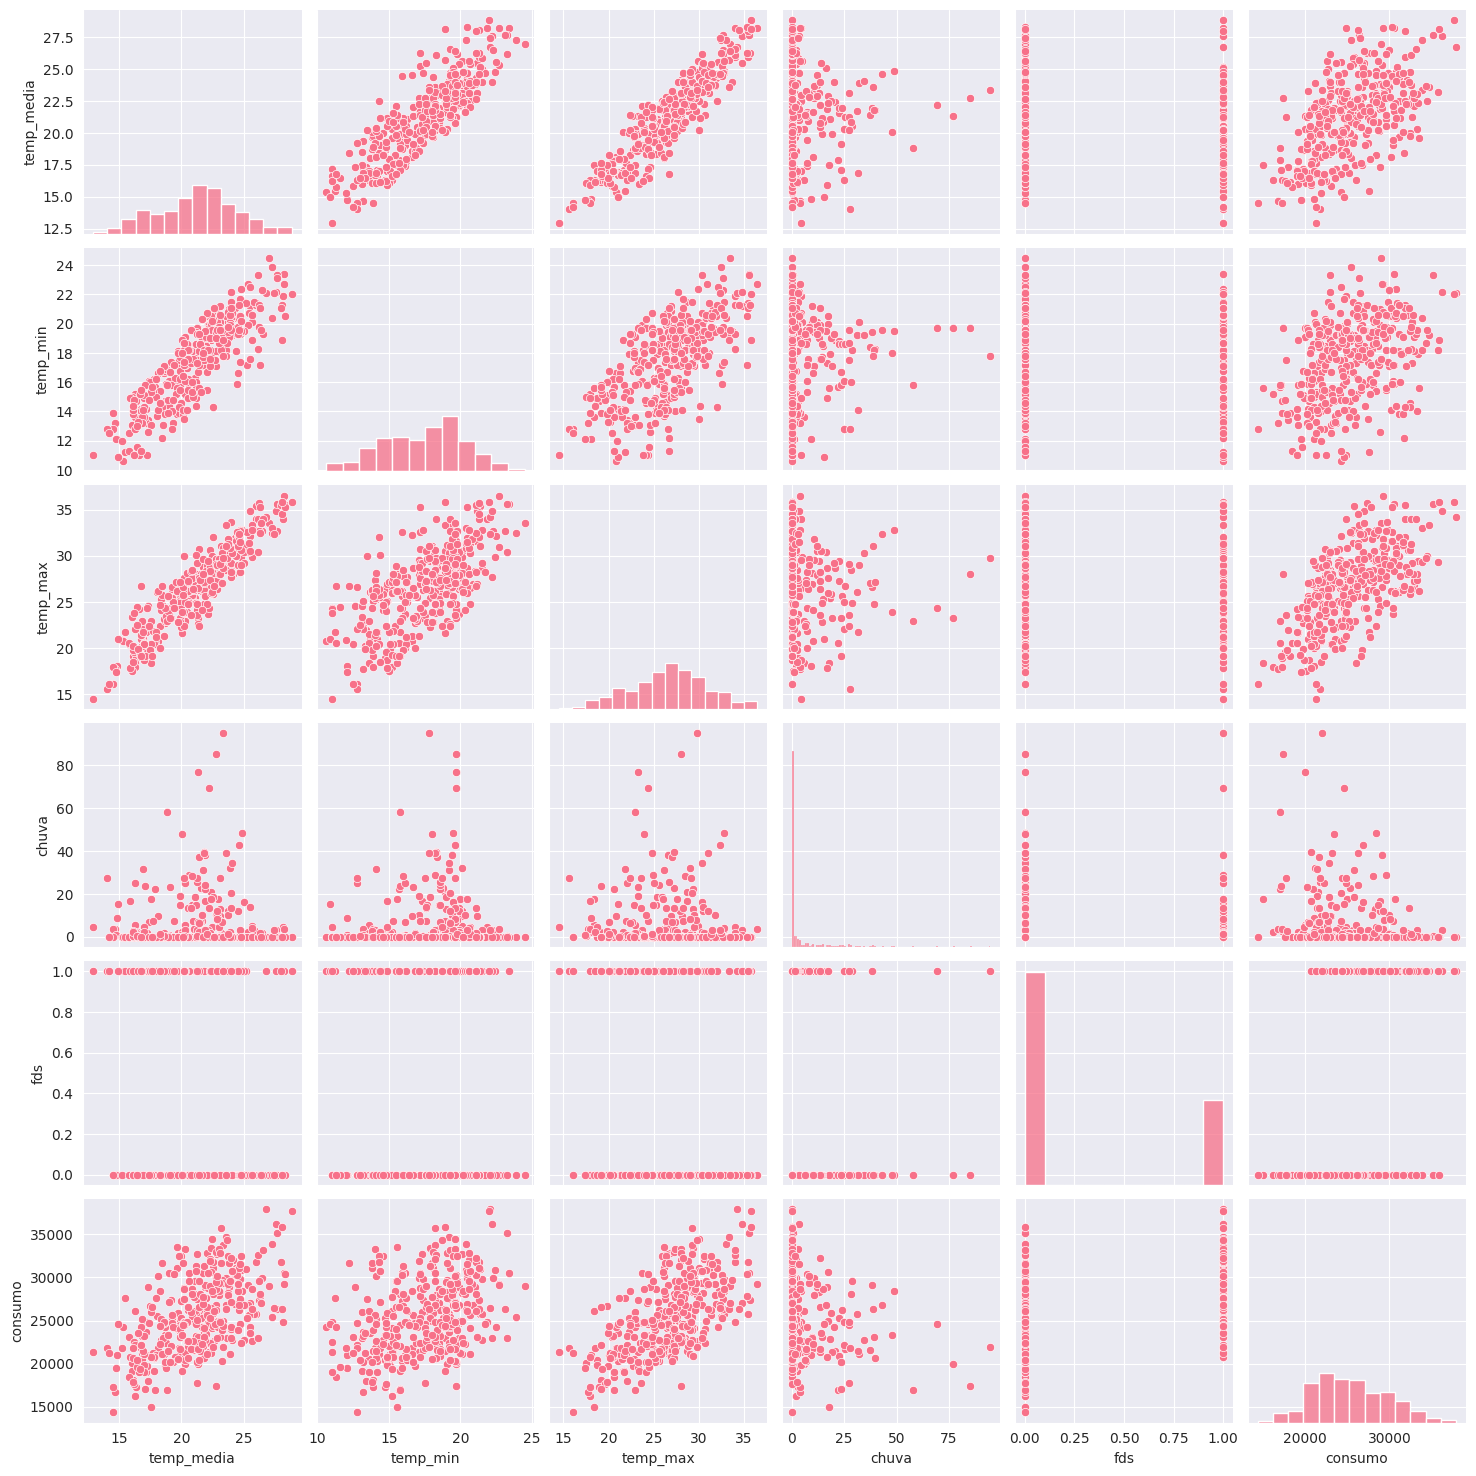

In [339]:
sns.pairplot(Dados)

## Plotando o pairplot fixando somente uma variável no eixo y

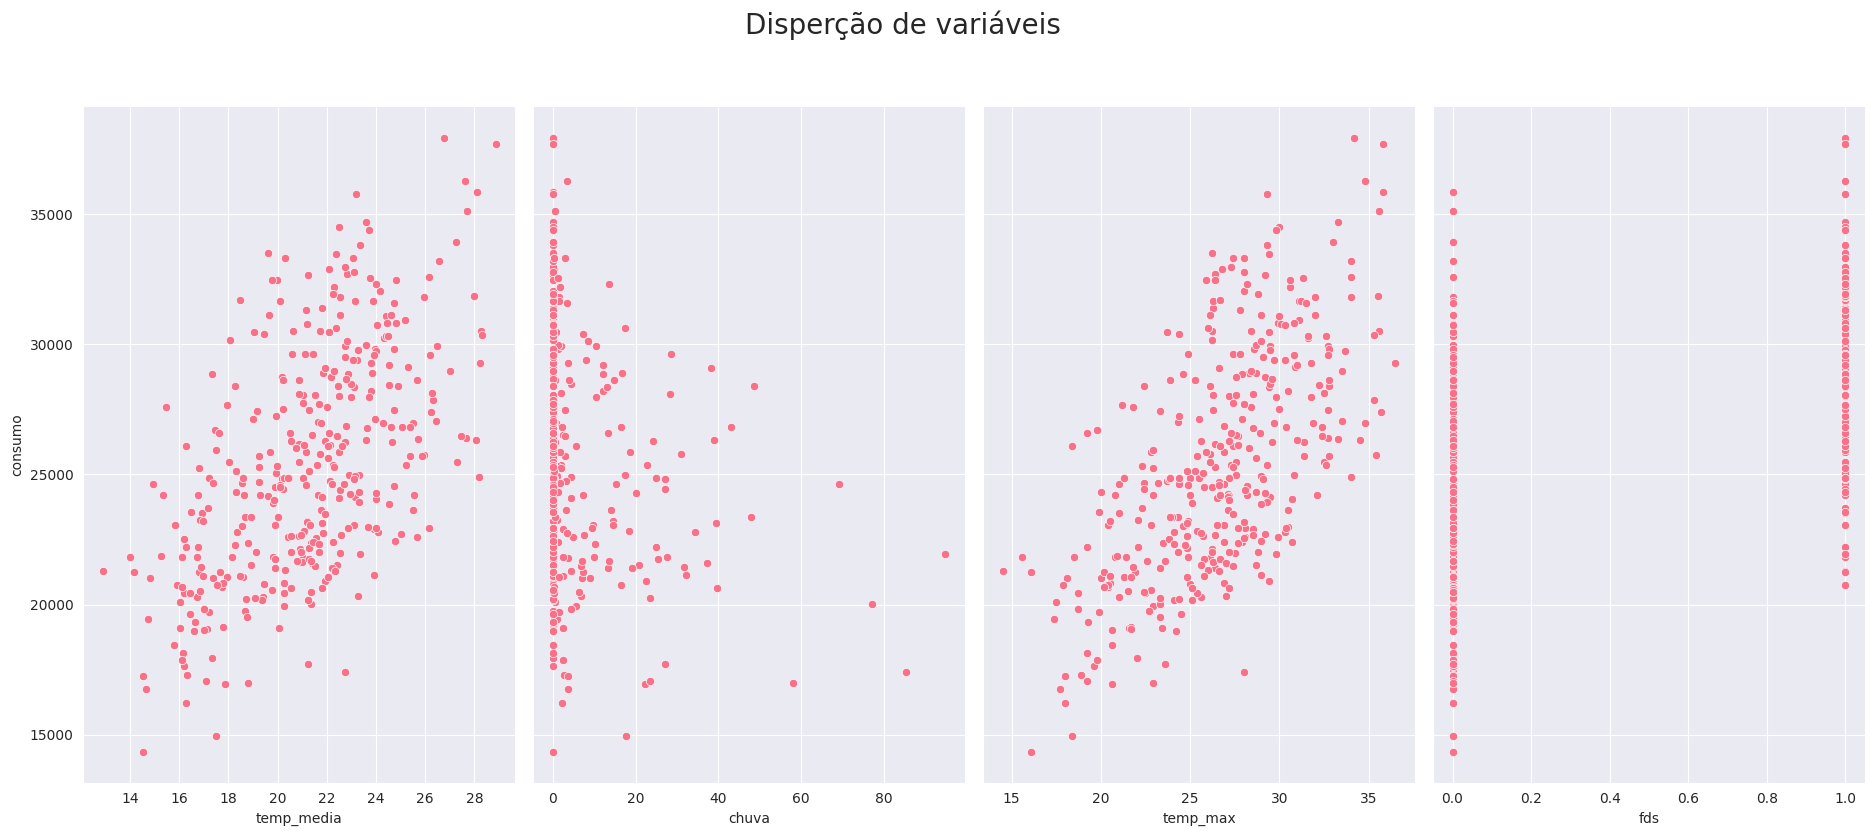

In [340]:
pp=sns.pairplot(Dados, y_vars='consumo', x_vars= ['temp_media','chuva','temp_max','fds'])
pp.fig.set_size_inches(20, 9)
pp.fig.suptitle( 'Disperção de variáveis', fontsize=20, y= 1.07,)
pp

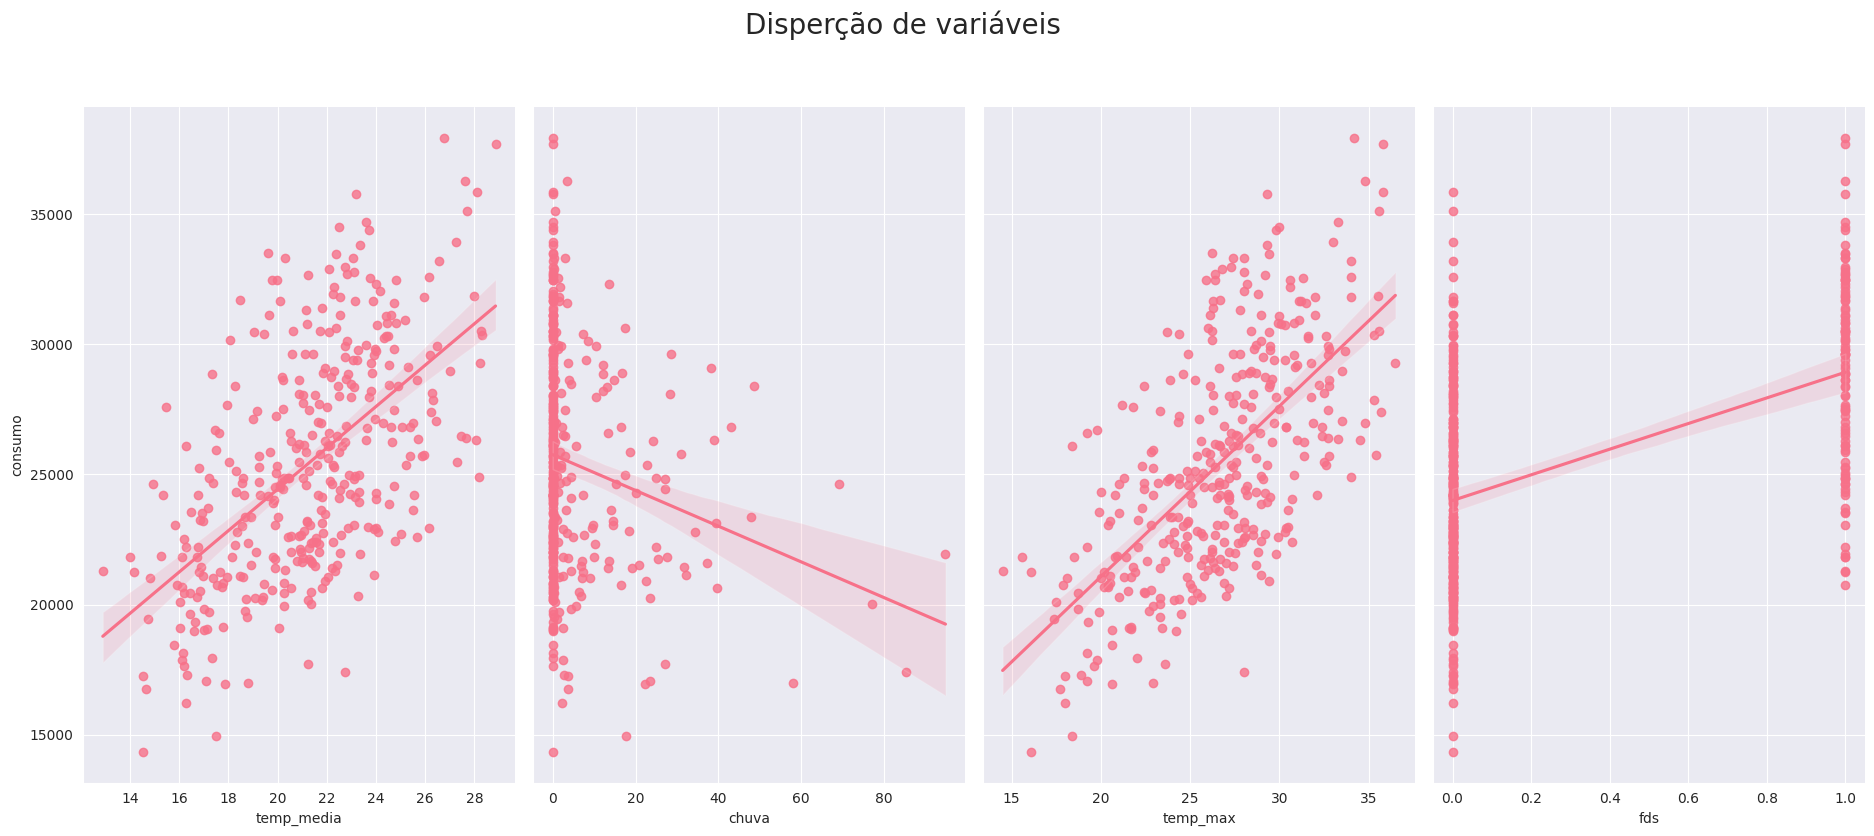

In [341]:
pp=sns.pairplot(Dados, y_vars='consumo', x_vars= ['temp_media','chuva','temp_max','fds'],kind='reg')
pp.fig.set_size_inches(20, 9)
pp.fig.suptitle( 'Disperção de variáveis', fontsize=20, y= 1.07,)
pp

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (jointplot)</font>
<hr style='border: 2px solid red;'>

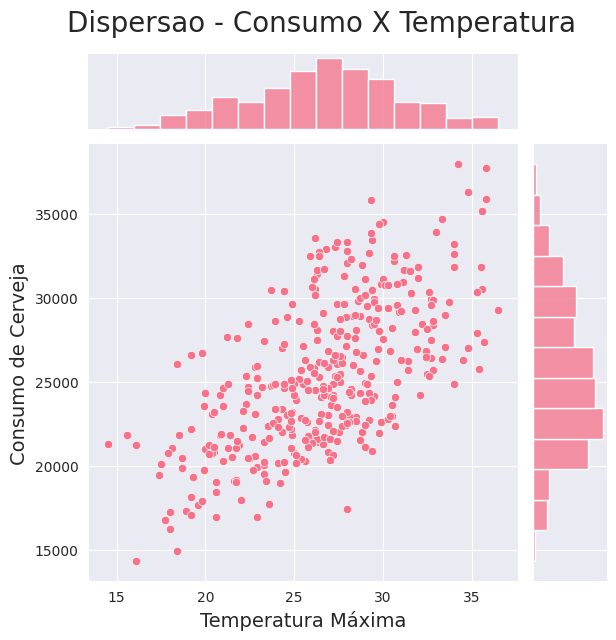

In [342]:
jp= sns.jointplot(x="temp_max", y="consumo", data=Dados)
jp.fig.suptitle('Dispersao - Consumo X Temperatura', fontsize=20, y=1.05)
jp.set_axis_labels("Temperatura Máxima", "Consumo de Cerveja", fontsize=14)
jp

## Plotando um jointplot com a reta de regressão estimada

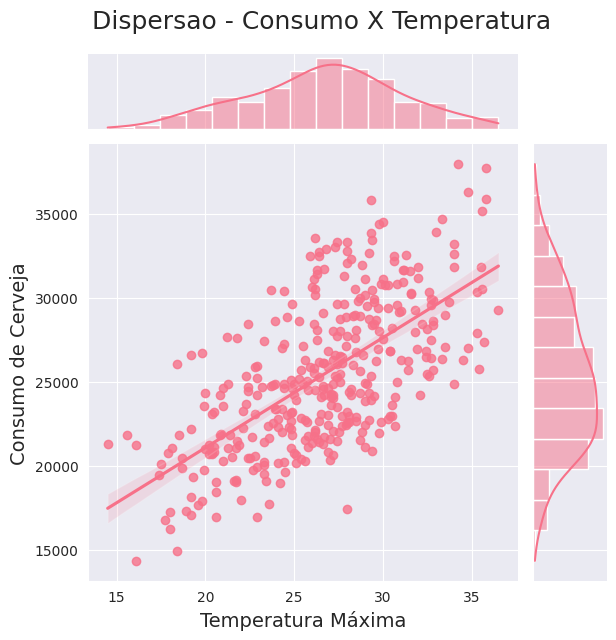

In [343]:
jp= sns.jointplot(x="temp_max", y="consumo", data=Dados, kind='reg')
jp.fig.suptitle('Dispersao - Consumo X Temperatura', fontsize=18, y=1.05)
jp.set_axis_labels("Temperatura Máxima", "Consumo de Cerveja", fontsize=14)
jp

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (lmplot)</font>
<hr style='border: 2px solid red;'>

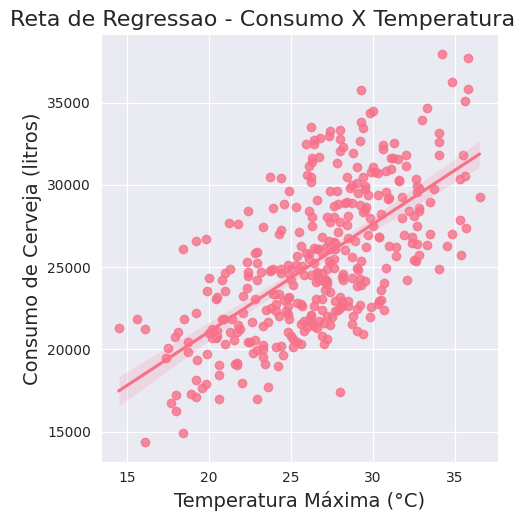

In [344]:
lp= sns.lmplot(x="temp_max", y="consumo", data=Dados)
lp.fig.suptitle('Reta de Regressao - Consumo X Temperatura', fontsize=16, y=1.02)
lp.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
lp.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
lp

## Plotando um lmplot utilizando uma terceira variável na análise (tipo I)

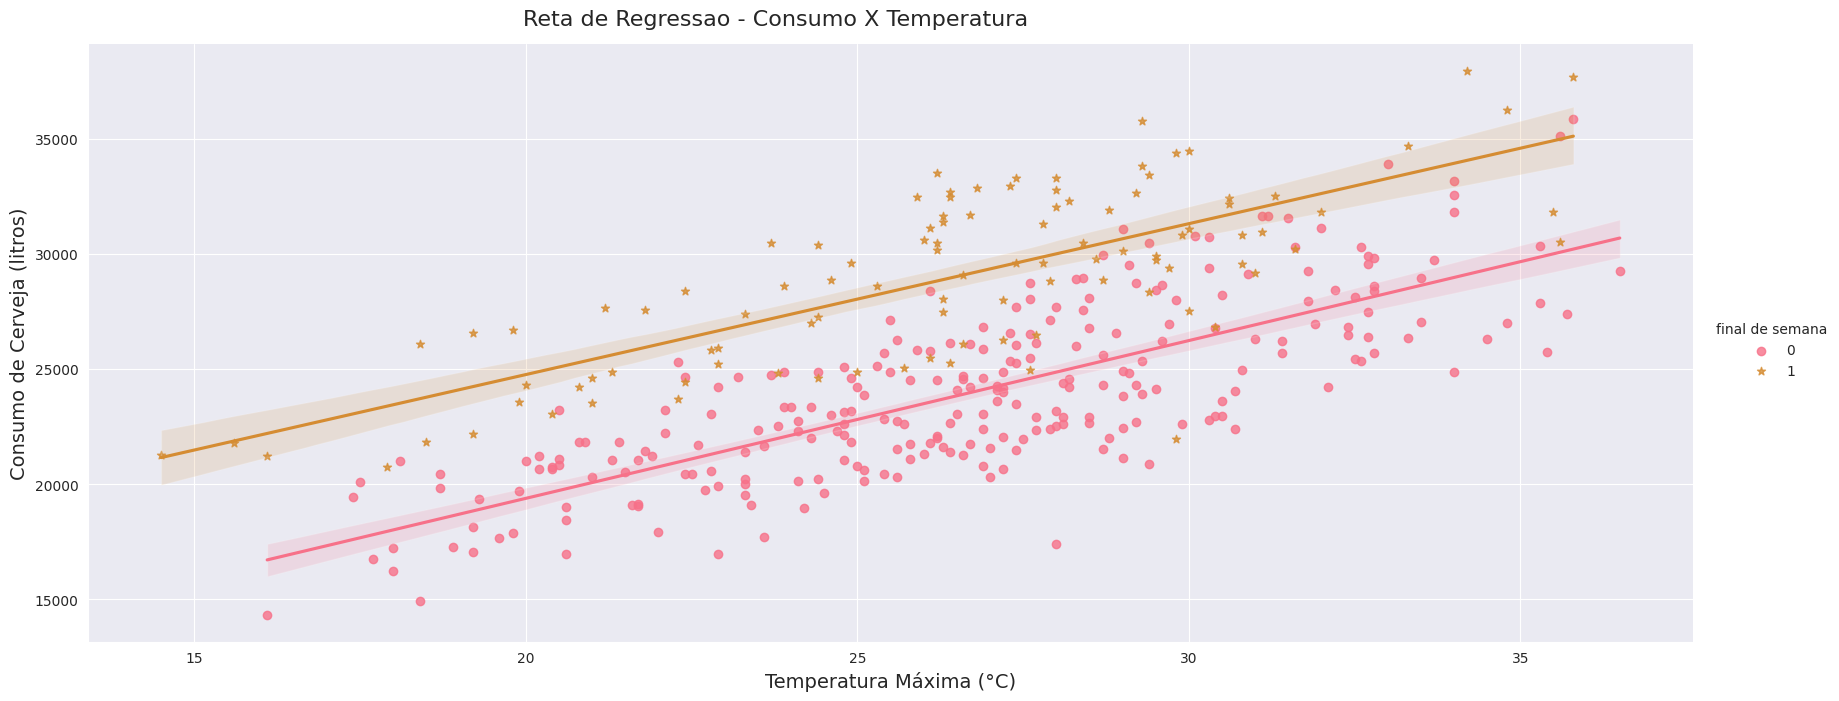

In [345]:
lp= sns.lmplot(x="temp_max", y="consumo", data=Dados,hue= 'fds', legend=False, markers=['o','*'])
lp.fig.suptitle('Reta de Regressao - Consumo X Temperatura', fontsize=16, y=1.02)
lp.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
lp.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
lp.fig.set_size_inches(20,7)
lp.add_legend(title='final de semana')

## Plotando um lmplot utilizando uma terceira variável na análise (tipo II)

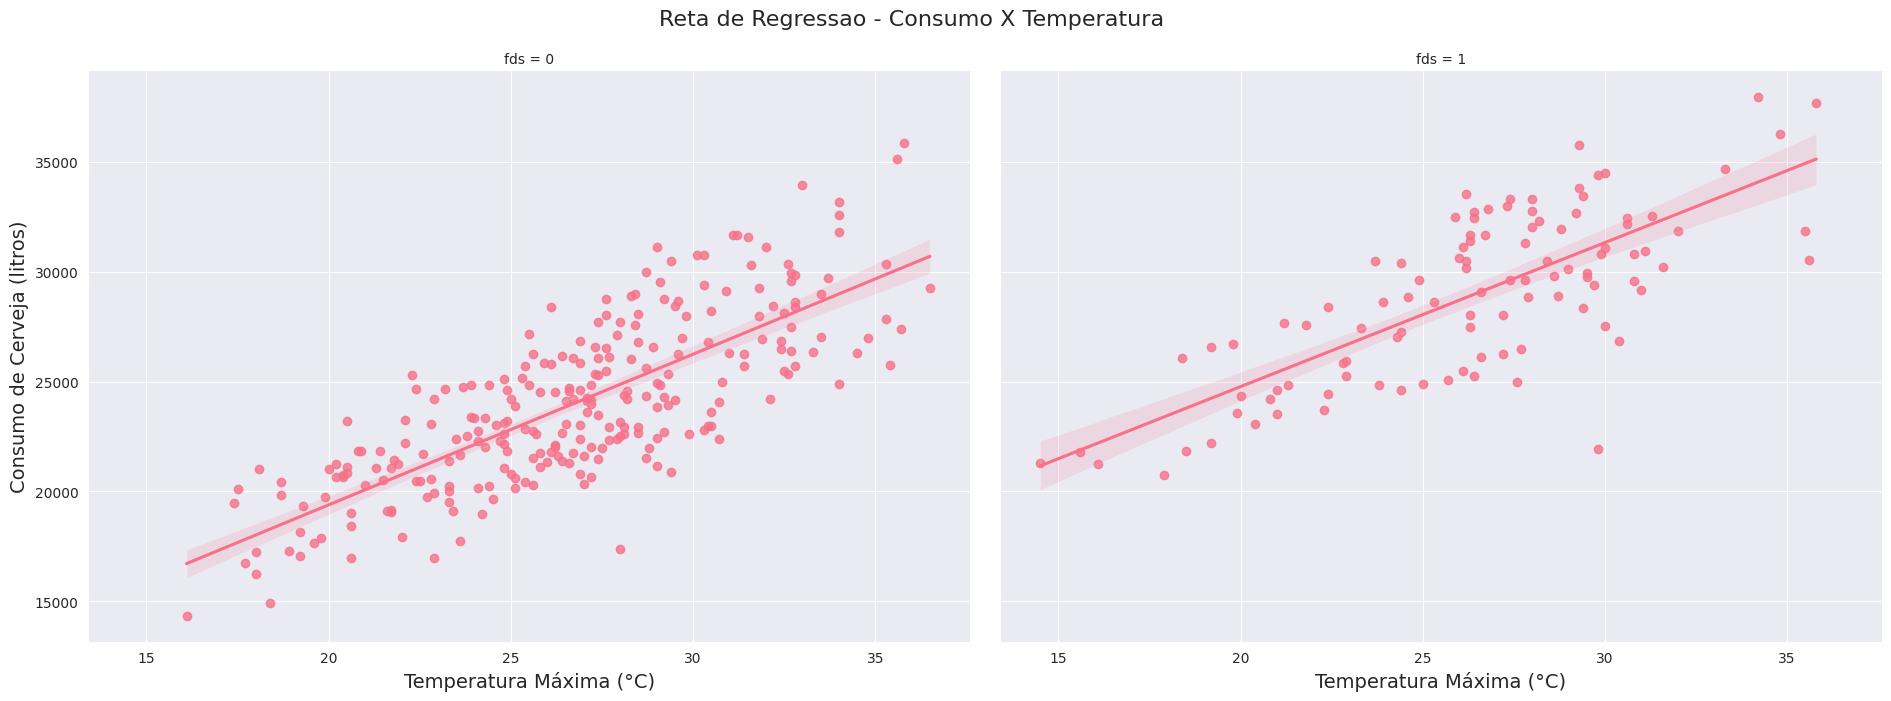

In [346]:
lp= sns.lmplot(x="temp_max", y="consumo", data=Dados,col= 'fds')
lp.fig.suptitle('Reta de Regressao - Consumo X Temperatura', fontsize=16, y=1.02)
lp.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
lp.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
lp.fig.set_size_inches(20,7)
lp

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear para o Consumo</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [347]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Consumo de Cerveja (y)

In [348]:
y= Dados['consumo']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [349]:
X= Dados[['temp_max','fds','chuva']]

## Criando os datasets de treino e de teste

In [350]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

## Verificando os tamanhos dos arquivos gerados pela função *train_test_split*

In [351]:
X_train.shape

(255, 3)

In [352]:
X_test.shape

(110, 3)

In [353]:
X_train.shape[0]+X_test.shape[0]

365

In [354]:
X.shape

(365, 3)

<img width='600px' src='../Dados/img/reg_01.jpg'>

In [355]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [356]:
Modelo= LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [357]:
Modelo.fit(X_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [358]:
print('R² = {}'. format(Modelo.score(X_train, y_train)))

R² = 0.7336167014928967


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [359]:
y_previsto= Modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [360]:
print('R² %s' % metrics.r2_score(y_test, y_previsto))

R² 0.6907364667750691


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [361]:
entrada= X_test [0:1]
entrada

,temp_max,fds,chuva
5,30.5,0,12.2


## Gerando previsão pontual

In [362]:
round(Modelo.predict(entrada)[0],2)

26094.9

## Criando um simulador simples

In [363]:
#estava na sequencia errada
temperatura_maxima= 19.0
f_d_s_sim_ou_não= 1
Chuva_esperada= 12.8
Resposta_para_a_simulação=[[temperatura_maxima, f_d_s_sim_ou_não, Chuva_esperada]]

print('{:.2f} Litros'.format(Modelo.predict(Resposta_para_a_simulação)[0]))

23585.04 Litros


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# <font color='red' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

<img width='600px' src='../Dados/img/reg_02.jpg'>

## Obtendo o intercepto do modelo



In [364]:
Modelo.intercept_

5951.976339312445

In [365]:
type(Modelo.intercept_)

numpy.float64

## Obtendo os coeficientes de regressão



In [366]:
Modelo.coef_

array([ 684.73675898, 5401.08333866,  -60.7824355 ])

## Confirmando a ordem das variáveis explicativas no DataFrame

In [367]:
X.columns

Index(['temp_max', 'fds', 'chuva'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [368]:
indice=['Intercepto', 'Temperatura Maxima', 'Final de semana', 'chuva']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [369]:
import numpy as np

In [370]:
pd.DataFrame(data=np.append(Modelo.intercept_, Modelo.coef_), index=indice, columns=['parâmetros'])

,parâmetros
Intercepto,5951.976339
Temperatura Maxima,684.736759
Final de semana,5401.083339
chuva,-60.782435


## Interpretação dos Coeficientes Estimados



# <font color='red' style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [371]:
y_previsto_train= Modelo.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<Axes: title={'center': 'Previsão X Real'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Consumo de Cerveja (litros) - Real'>

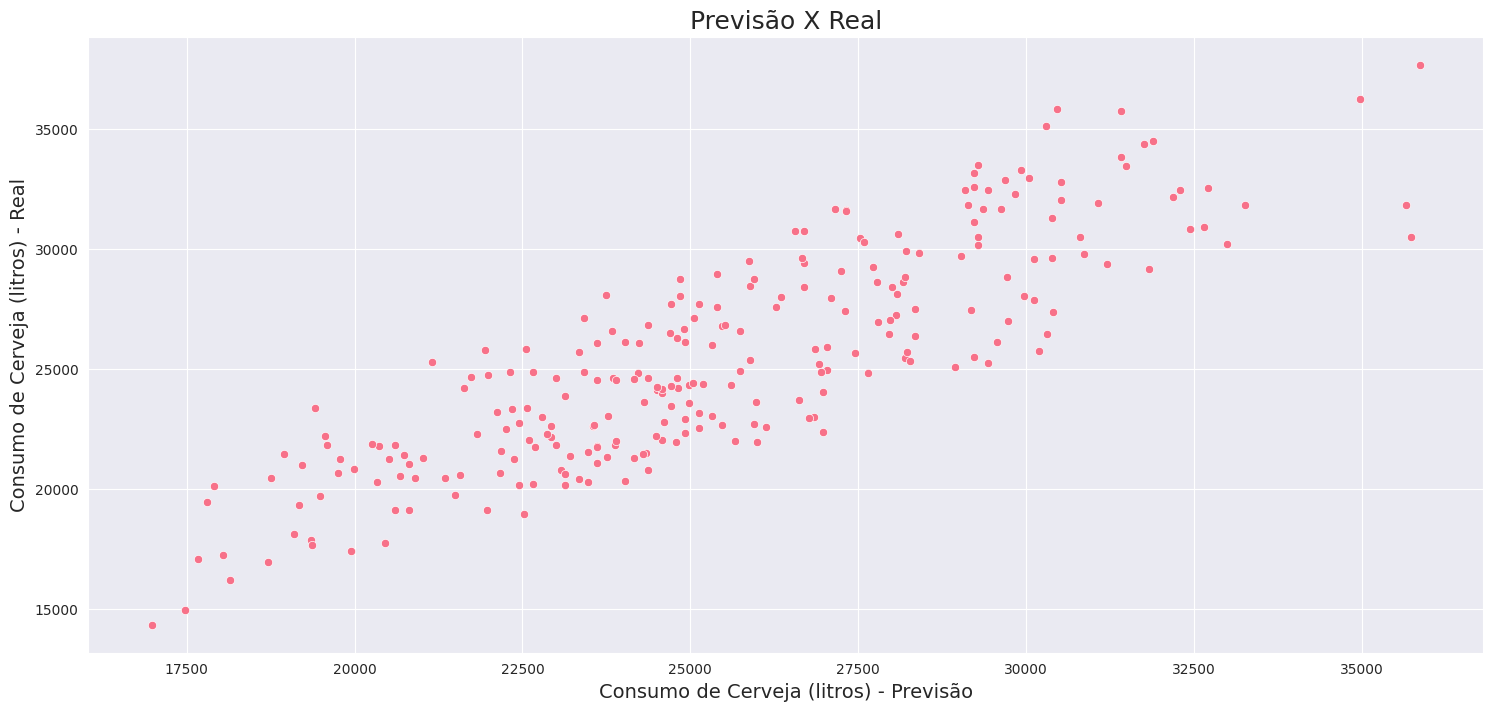

In [372]:
GD_er = sns.scatterplot(x=y_previsto_train, y=y_train)
GD_er.figure.set_size_inches(18, 8)
GD_er.set_title('Previsão X Real', fontsize=18)
GD_er.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
GD_er.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize=14)
GD_er

## Obtendo os resíduos

In [373]:
# Para obter os residuos é necessário diminuir o 'y real' pelo 'y previsto'
residuo= y_train - y_previsto_train

## Gráfico de dispersão entre valor estimado e resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Resíduos'>

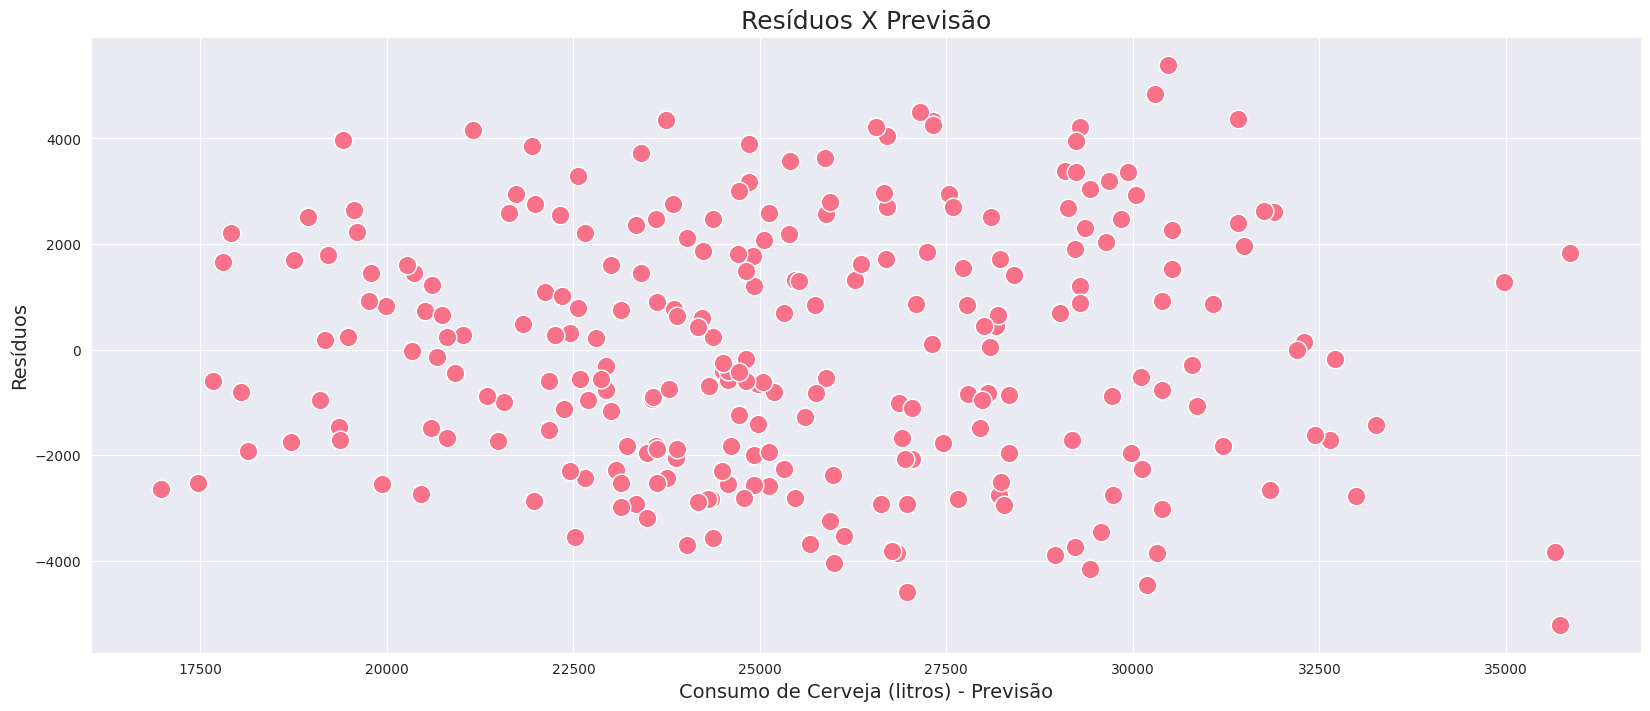

In [374]:
GD_ER = sns.scatterplot(x=y_previsto_train, y=residuo, s=180)
GD_ER.figure.set_size_inches(20, 8)
GD_ER.set_title('Resíduos X Previsão', fontsize=18)
GD_ER.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
GD_ER.set_ylabel('Resíduos', fontsize=14)
GD_ER

## Utilizando os resíduos ao quadrado

<img width='800px' src='../Dados/img/var_u.jpg'>
Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Resíduos²'>

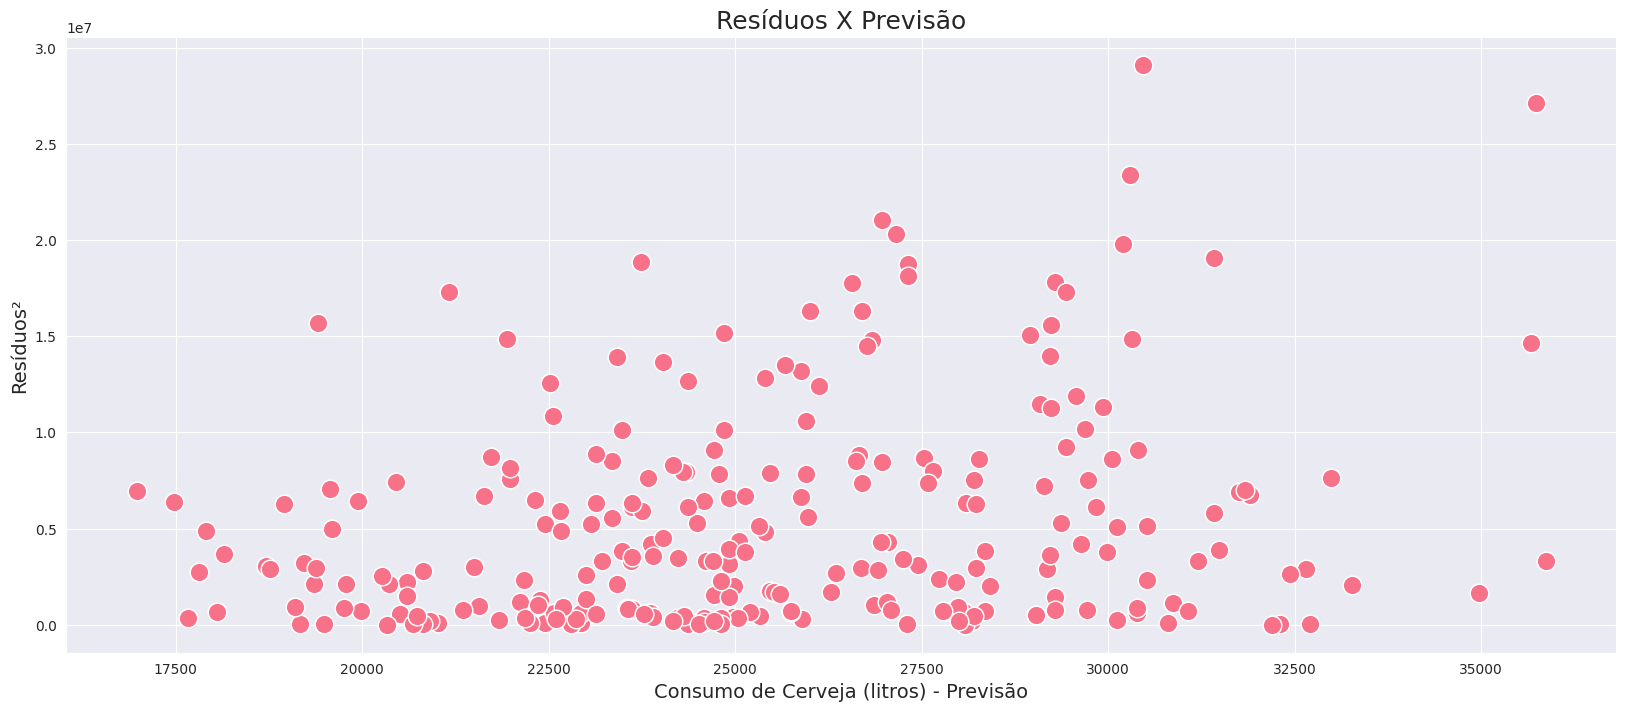

In [375]:
GD_ER2 = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=180)
GD_ER2.figure.set_size_inches(20, 8)
GD_ER2.set_title('Resíduos X Previsão', fontsize=18)
GD_ER2.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
GD_ER2.set_ylabel('Resíduos²', fontsize=14)
GD_ER2

## Plotando a distribuição de frequências dos resíduos

<ipython-input-376-57911b65ad2c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  DFr = sns.distplot(residuo, bins= 10)


<Axes: title={'center': 'Distribuição de Frequências dos Resíduos'}, xlabel='Litros', ylabel='Density'>

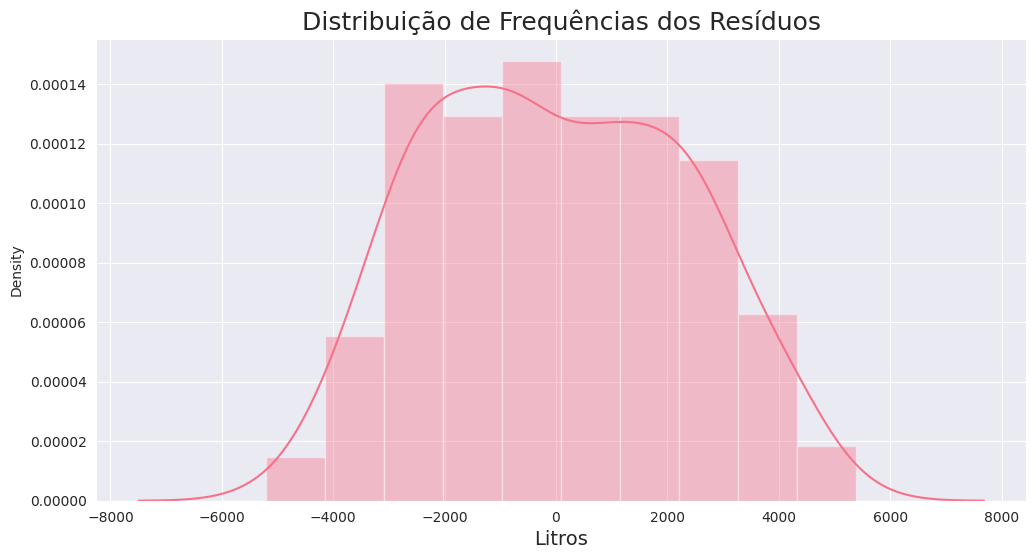

In [376]:
DFr = sns.distplot(residuo, bins= 10)
DFr.figure.set_size_inches(12, 6)
DFr.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
DFr.set_xlabel('Litros', fontsize=14)
DFr

# <font color='red' style='font-size: 30px;'>Comparando Modelos</font>
<hr style='border: 2px solid red;'>

## Estimando um novo modelo com a substituição da variável explicativa Temperatura Máxima pela Temperatuda Média

In [377]:
X2 = Dados[['temp_media', 'chuva', 'fds']]

## Criando os datasets de treino e de teste

In [378]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)

## Instanciando a classe *LinearRegression()*

In [379]:
Modelo2= LinearRegression()

## Utilizando o método *fit()* do objeto "modelo_2" para estimar nosso modelo linear utilizando os dados de TREINO (y2_train e X2_train)

In [380]:
Modelo2.fit(X2_train, y2_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [381]:
# Quanto mais proximo de 1 melhor é o modelo
print('Modelo com Tem. Medía')
print('R² = {}'.format(Modelo2.score(X2_train, y2_train)))

Modelo com Tem. Medía
R² = 0.6617640611940382


In [382]:
print('Modelo com Tem. Máxima')
print('R² = {}'.format(Modelo.score(X_train, y_train)))

Modelo com Tem. Máxima
R² = 0.7336167014928967


## Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"

In [383]:
y_previsto
y_previsto_2= Modelo2.predict(X2_test)

## Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [384]:
print('Modelo com Tem. Medía')
print('R² = {}'.format(metrics.r2_score(y2_test,y_previsto_2 )))

Modelo com Tem. Medía
R² = 0.6574588953371101


In [385]:
print('Modelo com Tem. Maxima')
print('R² = {}'.format(metrics.r2_score(y_test,y_previsto )))

Modelo com Tem. Maxima
R² = 0.6907364667750691


1# <font color='red' style='font-size: 30px;'>Outras Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>



## Obtendo métricas para o modelo com Temperatura Média

In [386]:
# Quanto menor o EQM melhor se apresenta o modelo
EQM_2 = metrics.mean_squared_error(y2_test, y_previsto_2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_previsto_2))
R2_2 = metrics.r2_score(y2_test, y_previsto_2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['Erro Quadrático Médio', 'Raiz do Erro Quadrático Médio', 'coeficiente de determinação(R²)'], columns=['Métricas'])

,Métricas
Erro Quadrático Médio,6.060775e+06
Raiz do Erro Quadrático Médio,2.461864e+03
coeficiente de determinação(R²),6.574589e-01


## Obtendo métricas para o modelo com Temperatura Máxima

In [387]:
EQM = metrics.mean_squared_error(y_test, y_previsto)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto))
R2 = metrics.r2_score(y_test,y_previsto )

pd.DataFrame([EQM, REQM, R2], ['Erro Quadrático Médio', 'Raiz do Erro Quadrático Médio', 'coeficiente de determinação(R²)'], columns=['Métricas'])

,Métricas
Erro Quadrático Médio,5.471976e+06
Raiz do Erro Quadrático Médio,2.339226e+03
coeficiente de determinação(R²),6.907365e-01


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [388]:
X_test[0:1]

,temp_max,fds,chuva
5,30.5,0,12.2


In [389]:
Entrada=X_test[0:1]

## Gerando previsão pontual

In [390]:
Modelo.predict(entrada)[0]

26094.901775262024

## Criando um simulador simples

In [391]:
T_maxima= 30.5
final_de_semana= 0
C_milimetros= 12.2
simulador= [[T_maxima, final_de_semana, C_milimetros]]
imprint=print('{0:.2f} Litros'.format(Modelo.predict(simulador)[0]))
imprint

26094.90 Litros


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Salvando o modelo estimado

## pickle



In [392]:
import pickle

In [393]:
output= open('modelo_consumo_cerveja', 'wb')
pickle.dump(Modelo, output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_consumo_cerveja','rb')
lm_new = pickle.load(modelo)
modelo.close()

temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
26094.90 litros
```